In [1]:
%cd ../..

/remote/rds/users/s2086085/causica


# Imports

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
import numpy as np
from diffscm.utils import get_value_from_str

# Paths

In [3]:
figures_path = Path("diffscm/experiments/figures")
exp_results_path = Path("/home/s2086085/RDS/experiment_data/causal_discovery")

# Load data

In [4]:
results_dict_keys = ("dataset_name","method","shd","F1","tpr","sid") #,"nnodes","nedges","graph","sem","seed"
results_dict = dict(zip(results_dict_keys, [ [] for _ in range(len(results_dict_keys))]))

for dataset_path in exp_results_path.glob('*'):
    for method_path in dataset_path.glob('*'):   
        try:
            metrics = pd.read_csv(method_path / 'metrics.csv', index_col=0)
        except:
            continue
        results_dict["dataset_name"].append(dataset_path.name)
        results_dict["method"].append(method_path.name)
        results_dict["shd"].append(metrics["shd"].to_numpy()[0])
        results_dict["F1"].append(metrics["F1"].to_numpy()[0])
        results_dict["tpr"].append(metrics["tpr"].to_numpy()[0])
        try:
            results_dict["sid"].append(metrics["sid"].to_numpy()[0])
        except:
            results_dict["sid"].append(0)
            
#df = pd.read_csv(data_path, index_col=0)
results_df = pd.DataFrame(results_dict)

get_seed = lambda exp_name : get_value_from_str(exp_name,"seed",int)
results_df["seed"] = results_df["dataset_name"].apply(get_seed)
get_nnodes = lambda exp_name : get_value_from_str(exp_name,"nnodes",int)
results_df["nnodes"] = results_df["dataset_name"].apply(get_nnodes)
get_nedges = lambda exp_name : get_value_from_str(exp_name,"nedges",int)
results_df["nedges"] = results_df["dataset_name"].apply(get_nedges)
get_sem = lambda exp_name : get_value_from_str(exp_name,"sem")
results_df["sem"] = results_df["dataset_name"].apply(get_sem)
get_graph = lambda exp_name : get_value_from_str(exp_name,"graph")
results_df["graph"] = results_df["dataset_name"].apply(get_graph)
results_df.tail(4)

,dataset_name,method,shd,F1,tpr,sid,seed,nnodes,nedges,sem,graph
632,nnodes50_nedges1_graphER_semgp_seed2,NotearsMLP,31,0.5679,0.4510,0.0,2.0,50.0,1.0,gp,ER
633,nnodes50_nedges1_graphER_semgp_seed2,SCORE,11,0.8350,0.8431,0.0,2.0,50.0,1.0,gp,ER
634,nnodes50_nedges1_graphER_semgp_seed2,DiffANM_const,14,0.8333,0.8824,0.0,2.0,50.0,1.0,gp,ER
635,nnodes50_nedges1_graphER_semgp_seed2,DiffANM,8,0.8654,0.8824,0.0,2.0,50.0,1.0,gp,ER


In [5]:
name = results_df.query("method == 'DiffANM_const'").iloc[0]["dataset_name"]
results_df.query(f"dataset_name == '{name}'")

,dataset_name,method,shd,F1,tpr,sid,seed,nnodes,nedges,sem,graph
0,nnodes20_nedges1_graphER_semgp_noisetypegauss_...,DiffANM_const,15,0.5,0.5714,0.0,2.0,20.0,1.0,gp,ER


# Get Synthetic

In [6]:
synthetic_groupby = results_df.query("sem == 'gp'").groupby(by = ["nnodes", "nedges", "graph", "method"])["shd","F1"]
synthetic_mean = synthetic_groupby.mean()
synthetic_std = synthetic_groupby.std()

/tmp/ipykernel_18901/220692232.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  synthetic_groupby = results_df.query("sem == 'gp'").groupby(by = ["nnodes", "nedges", "graph", "method"])["shd","F1"]


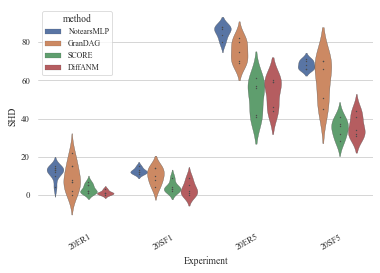

In [7]:
sns.set(context = 'paper',style='whitegrid', font_scale=1,
            rc={'figure.figsize':(2.75,2),'font.family':'serif', 
            'font.size':'10','font.serif':['Times New Roman'],"lines.linewidth":'0.3','legend.fontsize':'8'})
nodes = 20.0 # 10,20,50
metric_measure = "SHD" # SHD,F1
figure_df = results_df.query(f"sem == 'gp' and nnodes == {nodes}").sort_values(["nnodes","nedges","graph"])
figure_df["Experiment"] =figure_df["nnodes"].astype(int).astype("string")+ figure_df["graph"] + figure_df["nedges"].astype(int).astype("string")
figure_df["nnodes"] = figure_df["nnodes"].astype(int)
figure_df = figure_df.rename(columns={"shd": "SHD","nnodes":"n"})

sns.violinplot(data = figure_df, x = "Experiment", y = metric_measure, hue = "method",hue_order = ["NotearsMLP","GranDAG","SCORE","DiffANM"], 
                    bw = 'silverman', inner = "point", scale = 'width')#, cut = 0
plt.xticks(rotation=30)
sns.despine(left=True, bottom=True)
#plt.savefig(figures_path / f"synthetic_results_nnodes{nodes}_metric{metric_measure.lower()}.pdf", bbox_inches = 'tight')

# Get Real

In [8]:
syntren_gb = results_df[results_df["dataset_name"].str.contains("syntren_")].groupby(by = ["method"])
syntren_gb.mean(), syntren_gb.std()

(                            shd        F1       tpr         sid  seed  nnodes  \
 method                                                                          
 CAM                   43.500000  0.182650  0.241650  118.000000   NaN     NaN   
 DiffANM               43.900000  0.135130  0.165540    0.000000   NaN     NaN   
 DiffANM_const         50.222222  0.129967  0.180133  211.555556   NaN     NaN   
 DiffANM_greedy        51.333333  0.134157  0.140878  213.444444   NaN     NaN   
 DiffANM_no_norm       56.000000  0.092300  0.125000    0.000000   NaN     NaN   
 DiffANM_no_normbias   45.333333  0.215237  0.250911    0.000000   NaN     NaN   
 DiffANM_no_normbias3  45.444444  0.180411  0.237544    0.000000   NaN     NaN   
 DiffANM_residue       39.777778  0.236089  0.298089  173.555556   NaN     NaN   
 GranDAG               24.600000  0.149086  0.067390   16.300000   NaN     NaN   
 SCORE                 47.600000  0.191310  0.264820   17.500000   NaN     NaN   
 
              

In [9]:
results_df[results_df["dataset_name"].str.contains("sachs")]#.sort_values(by=['dataset_name','method'])#.groupby(by = ["method"]).mean()#["syntren" in results_df["dataset_name"]]#.query("'syntren' in dataset_name")

,dataset_name,method,shd,F1,tpr,sid,seed,nnodes,nedges,sem,graph
146,sachs_1,DiffANM_no_normbias,11,0.5185,0.4118,0.0,NaN,NaN,NaN,NaN,NaN
147,sachs_1,DiffANM_no_normbias2,11,0.5185,0.4118,0.0,NaN,NaN,NaN,NaN,NaN
148,sachs_1,DiffANM_no_normbias1,15,0.2222,0.1765,0.0,NaN,NaN,NaN,NaN,NaN
149,sachs_1,DiffANM_no_bias,14,0.3077,0.2353,0.0,NaN,NaN,NaN,NaN,NaN
150,sachs_1,DiffANM_residue,13,0.3704,0.2941,56.0,NaN,NaN,NaN,NaN,NaN
151,sachs_1,DiffANM_greedy,15,0.2222,0.1765,58.0,NaN,NaN,NaN,NaN,NaN
152,sachs_1,GranDAG,17,NaN,0.0000,53.0,NaN,NaN,NaN,NaN,NaN
153,sachs_1,DiffANM_no_norm,13,0.3846,0.2941,0.0,NaN,NaN,NaN,NaN,NaN
154,sachs_1,SCORE,12,0.4444,0.3529,45.0,NaN,NaN,NaN,NaN,NaN
155,sachs_1,CAM,12,0.4444,0.3529,55.0,NaN,NaN,NaN,NaN,NaN


# Pairs

In [10]:
pairs_path = exp_results_path / "DiffANM_pairs" / "results.csv"
pairs_df = pd.read_csv(pairs_path, index_col=False)

In [11]:
pairs_df.iloc[1].sum() / pairs_df.sum().sum() 

0.45454545454545453

# Synthetic

In [59]:
results_dict_keys = ("dataset_name","exp_name","method","shd","F1","tpr","sid","runtime") #,"nnodes","nedges","graph","sem","seed"
results_dict = dict(zip(results_dict_keys, [ [] for _ in range(len(results_dict_keys))]))
exp_results_path_syn = exp_results_path / "synthetic"
for dataset_path in exp_results_path_syn.glob('*'):
    for method_path in dataset_path.glob('*'):   
        try:
            metrics = pd.read_csv(method_path / 'metrics.csv', index_col=0)
        except:
            continue
        results_dict["dataset_name"].append(dataset_path.name)
        results_dict["exp_name"].append(dataset_path.name[:dataset_path.name.find("seed")-1])
        results_dict["method"].append(method_path.name)
        results_dict["shd"].append(metrics["shd"].to_numpy()[0])
        results_dict["F1"].append(metrics["F1"].to_numpy()[0])
        results_dict["tpr"].append(metrics["tpr"].to_numpy()[0])
        results_dict["runtime"].append(metrics["runtime"].to_numpy()[0])
        try:
            results_dict["sid"].append(metrics["sid"].to_numpy()[0])
        except:
            results_dict["sid"].append(0)
            
results_df = pd.DataFrame(results_dict)

get_seed = lambda exp_name : get_value_from_str(exp_name,"seed",int)
results_df["seed"] = results_df["dataset_name"].apply(get_seed)
get_nnodes = lambda exp_name : get_value_from_str(exp_name,"nnodes",int)
results_df["nnodes"] = results_df["dataset_name"].apply(get_nnodes)
get_nedges = lambda exp_name : get_value_from_str(exp_name,"nedges",int)
results_df["nedges"] = results_df["dataset_name"].apply(get_nedges)
get_sem = lambda exp_name : get_value_from_str(exp_name,"sem")
results_df["sem"] = results_df["dataset_name"].apply(get_sem)
get_graph = lambda exp_name : get_value_from_str(exp_name,"graph")
results_df["graph"] = results_df["dataset_name"].apply(get_graph)
get_noisetype = lambda exp_name : get_value_from_str(exp_name,"noisetype")
results_df["noisetype"] = results_df["dataset_name"].apply(get_noisetype)
filter_noise = lambda noise_type : "gauss" if noise_type == np.nan else noise_type
results_df["noisetype"] = results_df["noisetype"].apply(filter_noise)
results_df["exp_name"] =results_df["nnodes"].astype("string")+ results_df["graph"] + results_df["nedges"].astype("string")
results_df.tail(10)

,dataset_name,exp_name,method,shd,F1,tpr,sid,runtime,seed,nnodes,nedges,sem,graph,noisetype
931,nnodes20_nedges1_graphER_semgp_noisetypegauss_...,20ER1,DiffANM_const,4.0,0.7742,0.8000,28.0,26.580506,0,20,1,gp,ER,gauss
932,nnodes20_nedges1_graphER_semgp_noisetypegauss_...,20ER1,DiffANM_residue_all_diag1_5k,15.0,0.3784,0.4667,49.0,41.958624,0,20,1,gp,ER,gauss
933,nnodes20_nedges1_graphER_semgp_noisetypegauss_...,20ER1,DiffANM_residue,5.0,0.7500,0.8000,22.0,26.086787,0,20,1,gp,ER,gauss
934,nnodes20_nedges1_graphER_semgp_noisetypegauss_...,20ER1,DiffANM_greedy,4.0,0.8125,0.8667,13.0,128.505428,0,20,1,gp,ER,gauss
935,nnodes20_nedges1_graphER_semgp_noisetypegauss_...,20ER1,GranDAG,3.0,0.8889,0.8000,7.0,338.658542,0,20,1,gp,ER,gauss
936,nnodes20_nedges1_graphER_semgp_noisetypegauss_...,20ER1,DiffANM_residue_all,12.0,0.5000,0.6000,38.0,46.807553,0,20,1,gp,ER,gauss
937,nnodes20_nedges1_graphER_semgp_noisetypegauss_...,20ER1,SCORE,11.0,0.5143,0.6000,45.0,24.610328,0,20,1,gp,ER,gauss
938,nnodes20_nedges1_graphER_semgp_noisetypegauss_...,20ER1,DiffANM_residue_all_diag1,9.0,0.6061,0.6667,31.0,29.844823,0,20,1,gp,ER,gauss
939,nnodes20_nedges1_graphER_semgp_noisetypegauss_...,20ER1,CAM,2.0,0.9032,0.9333,6.0,82.605389,0,20,1,gp,ER,gauss
940,nnodes20_nedges1_graphER_semgp_noisetypegauss_...,20ER1,DiffANM_const,4.0,0.8125,0.8667,12.0,30.637768,0,20,1,gp,ER,gauss


In [44]:
results_df["method"] = results_df["method"].map({"DiffANM_greedy":"DiffAN_greedy",
                                "DiffANM_residue_all_diag1":"DiffAN",
                                #"DiffANM_residue_all_diag1_5k":"DiffAN_5k",
                                "SCORE":"SCORE",
                                "CAM":"CAM",
                                "GranDAG":"GranDAG"
                                })

In [60]:
results_df["method"] = results_df["method"].map({"DiffANM_greedy":"DiffAN_greedy",
                                "DiffANM_residue_all_diag1":"DiffAN",
                                "DiffANM_const":"DiffANM_masking",
                                })

In [45]:
synthetic_groupby = results_df.groupby(by = ["exp_name", "noisetype", "method"])["shd","sid","runtime"]
synthetic_groupby_mean = synthetic_groupby.mean()#agg(['mean', 'std'])
synthetic_groupby_mean.tail(5)

/tmp/ipykernel_18901/3064786417.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  synthetic_groupby = results_df.groupby(by = ["exp_name", "noisetype", "method"])["shd","sid","runtime"]


shd         sid     runtime
exp_name noisetype method                                          
20SF5    laplace   CAM            49.500000  191.333333  160.525175
                   DiffAN         52.000000  230.666667   29.054317
                   DiffAN_greedy  47.000000  191.333333  173.420994
                   GranDAG        65.000000  262.500000  295.404044
                   SCORE          46.666667  193.833333   43.841207

In [57]:
f_string = lambda x : '$'+f'{x:.2f}_'
synthetic_groupby_mean = synthetic_groupby.mean().applymap(f_string) #.to_string(float_format="%.2f")
f_string = lambda x : '{'+f'{x:.2f}'+'}$'
synthetic_groupby_std = synthetic_groupby.std().applymap(f_string) #.to_string(float_format="%.2f")
synthetic_groupby_mean_std_str = synthetic_groupby_mean + synthetic_groupby_std
latex = synthetic_groupby_mean_std_str.to_latex()#query("nnodes == 20 and method != 'DiffANM_const'").
print(latex)

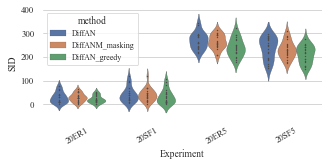

In [68]:
sns.set(context = 'paper',style='whitegrid', font_scale=1,
            rc={'figure.figsize':(5,2),'font.family':'serif', #(2.75,2)
            'font.size':'10','font.serif':['Times New Roman'],"lines.linewidth":'0.3','legend.fontsize':'8'})
nodes = 20 # 10,20,50
metric_measure = "SID" # SHD,F1
figure_df = results_df.query(f"sem == 'gp' and nnodes == {nodes}").sort_values(["nnodes","nedges","graph"])
figure_df["Experiment"] =figure_df["nnodes"].astype(int).astype("string")+ figure_df["graph"] + figure_df["nedges"].astype(int).astype("string")
figure_df["nnodes"] = figure_df["nnodes"].astype(int)
figure_df = figure_df.rename(columns={"shd": "SHD","sid": "SID","nnodes":"n"})

sns.violinplot(data = figure_df, x = "Experiment", y = metric_measure, 
                    hue = "method", hue_order = ["DiffAN","DiffANM_masking","DiffAN_greedy"], # ["DiffAN","DiffAN_greedy","DiffANM_masking"],["GranDAG","CAM","SCORE","DiffAN"]
                    bw = 'silverman', inner = "point", scale = 'width')#, cut = 0
plt.xticks(rotation=30)
sns.despine(left=True, bottom=True)
plt.savefig(figures_path / f"synthetic_results_nnodes{nodes}_metric{metric_measure.lower()}_ablations.pdf", bbox_inches = 'tight')

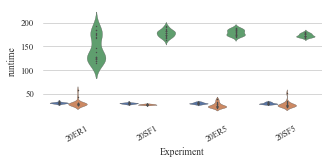

In [69]:
nodes = 20 # 10,20,50
metric_measure = "runtime" # SHD,F1
#figure_df = figure_df.rename(columns={"shd": "SHD","nnodes":"n"})

sns.violinplot(data = figure_df, x = "Experiment", y = metric_measure, hue = "method",
                    hue_order = ["DiffAN","DiffANM_masking","DiffAN_greedy"],#hue_order = ["GranDAG","CAM","SCORE","DiffAN"],
                    bw = 'silverman', inner = "point", scale = 'width',legend = False)#, cut = 0
plt.xticks(rotation=30)
sns.despine(left=True, bottom=True)
plt.legend([],[], frameon=False)
plt.savefig(figures_path / f"synthetic_results_nnodes{nodes}_metric{metric_measure.lower()}_ablations.pdf", bbox_inches = 'tight')

In [18]:
synthetic_mean

shd       F1
nnodes nedges graph method                    
10.0   1.0    ER    DiffANM       0.6  0.94284
                    GranDAG       0.6  0.96090
                    NotearsMLP    2.4  0.78778
                    SCORE         0.4  0.97142
              SF    DiffANM       1.2  0.89102
...                               ...      ...
100.0  1.0    ER    SCORE        49.5  0.66525
              SF    DiffANM      45.0  0.66670
                    GranDAG      83.0  0.27830
                    SCORE        51.0  0.63640
       5.0    ER    DiffANM     384.0  0.41190

[71 rows x 2 columns]

In [19]:
results_df.iloc[0]["exp_name"]

'nnodes20_nedges1_graphER_semgp_noisetypegauss_noisesc0.4-0.8'

In [20]:
for dataset_path in exp_results_path_syn.glob('*'):
    for method_path in dataset_path.glob('*'):
        break

In [21]:
method_path
metrics = pd.read_csv(method_path / 'metrics.csv', index_col=0)
dataset_path.name,method_path.name

('nnodes20_nedges1_graphER_semgp_noisetypegauss_noisesc0.4-0.8_seed0',
 'DiffANM_residue_all_diag1_5k')

# Overfit

In [22]:
paths_scale = list(exp_results_path.glob("DiffANM_overfit_ablations/**/*results.csv"))
metrics = pd.read_csv(paths_scale[0], index_col=0)
for path_scale in paths_scale[1:]:
    metrics_new = pd.read_csv(path_scale, index_col=0)
    metrics = metrics.merge(metrics_new, on=list(metrics.columns), how='outer') 
metrics.groupby("method").mean()

,runtime,order_errors,order_errors_jac,order_errors_oneshot
method,,,,
False,13.388081,9.500000,13.119048,11.404762
True,30.298305,11.142857,13.976190,12.904762


# Greedy

In [23]:
paths_scale = list(exp_results_path.glob("DiffANM_greedy_ablations/**/*results.csv"))
metrics = pd.read_csv(paths_scale[0], index_col=0)
for path_scale in paths_scale[1:]:
    metrics_new = pd.read_csv(path_scale, index_col=0)
    metrics = metrics.merge(metrics_new, on=list(metrics.columns), how='outer') 
metrics

,dataset_name,method,runtime,ordering_errors
0,nnodes20_nedges5_graphER_semgp_noisetypegauss_...,oneshot_5,11.360585,11
1,nnodes500_nedges5_graphER_semgp_seed2,oneshot_5,1542.331854,991
2,nnodes20_nedges5_graphSF_semgp_noisetypeexp_no...,oneshot_5,11.028199,10
3,nnodes500_nedges1_graphER_semmlp_seed1,oneshot_5,1604.196102,232
4,nnodes500_nedges1_graphER_semmlp_seed0,oneshot_5,1629.259567,200
...,...,...,...,...
260,nnodes20_nedges5_graphER_semgp_noisetypelaplac...,opt,26.042913,6
261,nnodes20_nedges5_graphSF_semgp_noisetypeexp_no...,opt,49.037536,9
262,nnodes20_nedges5_graphER_semgp_noisetypelaplac...,opt,26.009035,17
263,nnodes20_nedges5_graphSF_semgp_noisetypeexp_no...,opt,41.830659,13


In [24]:
paths_scale = list(exp_results_path.glob("DiffANM_greedy_ablations/**/*results.csv"))
metrics = pd.read_csv(paths_scale[0], index_col=0)
for path_scale in paths_scale[1:]:
    metrics_new = pd.read_csv(path_scale, index_col=0)
    metrics = metrics.merge(metrics_new, on=list(metrics.columns), how='outer') 
metrics

,dataset_name,method,runtime,ordering_errors
0,nnodes20_nedges5_graphER_semgp_noisetypegauss_...,oneshot_5,11.360585,11
1,nnodes500_nedges5_graphER_semgp_seed2,oneshot_5,1542.331854,991
2,nnodes20_nedges5_graphSF_semgp_noisetypeexp_no...,oneshot_5,11.028199,10
3,nnodes500_nedges1_graphER_semmlp_seed1,oneshot_5,1604.196102,232
4,nnodes500_nedges1_graphER_semmlp_seed0,oneshot_5,1629.259567,200
...,...,...,...,...
260,nnodes20_nedges5_graphER_semgp_noisetypelaplac...,opt,26.042913,6
261,nnodes20_nedges5_graphSF_semgp_noisetypeexp_no...,opt,49.037536,9
262,nnodes20_nedges5_graphER_semgp_noisetypelaplac...,opt,26.009035,17
263,nnodes20_nedges5_graphSF_semgp_noisetypeexp_no...,opt,41.830659,13


In [25]:
metrics.groupby("method").mean().sort_values(by="ordering_errors")

,runtime,ordering_errors
method,,
greedy,743.984287,7.822222
opt,41.243872,11.739130
oneshot_5,461.819978,199.689655
oneshot_25,459.056615,201.034483
oneshot_50,471.930604,205.775862


# Scaling

In [26]:
paths_scale = list(exp_results_path.glob("*A100_scaling/*"))
metrics = pd.read_csv(paths_scale[0] / 'results.csv', index_col=0)
for path_scale in paths_scale[1:]:
    try:
        metrics_new = pd.read_csv(path_scale / 'results.csv', index_col=0)
        metrics = metrics.merge(metrics_new, on=list(metrics.columns), how='outer')
    except:
        continue
results_df = metrics
get_seed = lambda exp_name : get_value_from_str(exp_name,"seed",int)
results_df["seed"] = results_df["dataset_name"].apply(get_seed)
get_nnodes = lambda exp_name : get_value_from_str(exp_name,"nnodes",int)
results_df["nnodes"] = results_df["dataset_name"].apply(get_nnodes)
get_nedges = lambda exp_name : get_value_from_str(exp_name,"nedges",int)
results_df["nedges"] = results_df["dataset_name"].apply(get_nedges)
get_sem = lambda exp_name : get_value_from_str(exp_name,"sem")
results_df["sem"] = results_df["dataset_name"].apply(get_sem)
get_graph = lambda exp_name : get_value_from_str(exp_name,"graph")
results_df["graph"] = results_df["dataset_name"].apply(get_graph)
results_df["exp_name"] =results_df["nnodes"].astype("string")+ results_df["graph"] + results_df["nedges"].astype("string")
results_df = results_df.rename(columns={"ordering_errors": "Order Divergence","sample_size":"Sample Size","runtime":"Runtime (seconds)"})
results_df.columns

Index(['dataset_name', 'method', 'Runtime (seconds)', 'Order Divergence',
       'Sample Size', 'seed', 'nnodes', 'nedges', 'sem', 'graph', 'exp_name'],
      dtype='object')

In [27]:
list(exp_results_path.glob("*A100_scaling/nnodes500_nedges5_graphER_semmlp_seed0/**"))#nnodes500_nedges5_graphER_semmlp_seed0/results.csv

[PosixPath('/home/s2086085/RDS/experiment_data/causal_discovery/DiffANM_A100_scaling/nnodes500_nedges5_graphER_semmlp_seed0'),
 PosixPath('/home/s2086085/RDS/experiment_data/causal_discovery/DiffANM_residue_A100_scaling/nnodes500_nedges5_graphER_semmlp_seed0'),
 PosixPath('/home/s2086085/RDS/experiment_data/causal_discovery/SCORE_A100_scaling/nnodes500_nedges5_graphER_semmlp_seed0')]

In [28]:
results_df.query("dataset_name == 'nnodes500_nedges5_graphER_semmlp_seed0'")

,dataset_name,method,Runtime (seconds),Order Divergence,Sample Size,seed,nnodes,nedges,sem,graph,exp_name
21,nnodes500_nedges5_graphER_semmlp_seed0,DiffANM,1003.538549,1251,100,0,500,5,mlp,ER,500ER5
22,nnodes500_nedges5_graphER_semmlp_seed0,DiffANM,7397.964012,1028,1000,0,500,5,mlp,ER,500ER5
23,nnodes500_nedges5_graphER_semmlp_seed0,DiffANM,8017.536758,984,2000,0,500,5,mlp,ER,500ER5
24,nnodes500_nedges5_graphER_semmlp_seed0,DiffANM,9756.018783,996,5000,0,500,5,mlp,ER,500ER5
25,nnodes500_nedges5_graphER_semmlp_seed0,DiffANM,9292.824091,948,10000,0,500,5,mlp,ER,500ER5
26,nnodes500_nedges5_graphER_semmlp_seed0,DiffANM,10505.208673,1003,50000,0,500,5,mlp,ER,500ER5
27,nnodes500_nedges5_graphER_semmlp_seed0,DiffANM,9474.436795,986,100000,0,500,5,mlp,ER,500ER5
42,nnodes500_nedges5_graphER_semmlp_seed0,DiffANM,5141.847597,1027,5000,0,500,5,mlp,ER,500ER5
43,nnodes500_nedges5_graphER_semmlp_seed0,DiffANM,6312.566659,1003,10000,0,500,5,mlp,ER,500ER5
44,nnodes500_nedges5_graphER_semmlp_seed0,DiffANM,8011.632144,991,50000,0,500,5,mlp,ER,500ER5


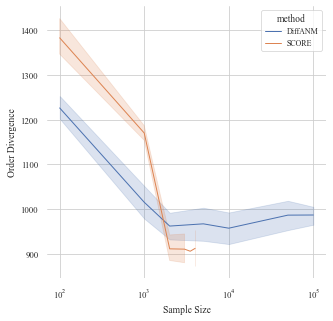

In [29]:
sns.set(context = 'paper',style='whitegrid', font_scale=1,
            rc={'figure.figsize':(5,5),'font.family':'serif', # (2.75,2), (5,5)
            'font.size':'10','font.serif':['Times New Roman'],"lines.linewidth":'1','legend.fontsize':'8'})
lineplot = sns.lineplot(data=results_df, x="Sample Size", y="Order Divergence", hue="method", ci = 90)
#lineplot.set(title='500 nodes')
plt.xscale('log')
sns.despine(left=True, bottom=True)
#lineplot.figure.savefig(figures_path / "DivergenceVsSample.pdf", bbox_inches = 'tight')

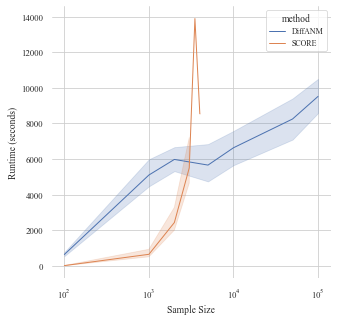

In [30]:
lineplot = sns.lineplot(data=results_df, x="Sample Size", y="Runtime (seconds)", hue="method", ci = 90)#
sns.despine(left=True, bottom=True)
plt.xscale('log')
#lineplot.figure.savefig(figures_path / "RuntimeVsSample.pdf", bbox_inches = 'tight')

# Dropout

In [31]:
results_dict_keys = ("dataset_name","method","ordering_errors","runtime") 
results_dict = dict(zip(results_dict_keys, [ [] for _ in range(len(results_dict_keys))]))
methods = ["const","random","single_random","double_random"]
path_dropout = exp_results_path / "DiffANM_mask_ablations"
for i,path_dropout_type in enumerate(list(path_dropout.glob("*"))):
    dropout_type = path_dropout_type.name
    if dropout_type != "double_random":
        continue
    print(path_dropout_type)
    for results_path in path_dropout_type.glob("**/*.csv"):
        df = pd.read_csv(results_path, index_col=0)
        #if "nnodes50" in str(results_path):
        #        continue
        if len(df) != 4:
            continue
        for i, dropout_type in enumerate(methods):
            dataset_name = df["dataset_name"].iloc[i]
            results_dict["runtime"].append(df["runtime"].iloc[i])
            results_dict["dataset_name"].append(dataset_name)
            results_dict["ordering_errors"].append(df["ordering_errors"].iloc[i])
            results_dict["method"].append(dropout_type)
results_df = pd.DataFrame(results_dict)

/home/s2086085/RDS/experiment_data/causal_discovery/DiffANM_mask_ablations/double_random


In [32]:
results_df.groupby("dataset_name").mean()

,ordering_errors,runtime
dataset_name,,
nnodes20_nedges5_graphER_semgp_noisetypeexp_noisesc0.4-0.8_seed1,13.25,37.331258
nnodes20_nedges5_graphER_semgp_noisetypeexp_noisesc0.4-0.8_seed2,8.75,31.680648
nnodes20_nedges5_graphER_semgp_noisetypeexp_noisesc0.8-1.2_seed0,11.25,29.728452
nnodes20_nedges5_graphER_semgp_noisetypeexp_noisesc0.8-1.2_seed1,19.00,27.069335
nnodes20_nedges5_graphER_semgp_noisetypeexp_noisesc0.8-1.2_seed2,9.00,32.702514
...,...,...
nnodes50_nedges5_graphSF_semgp_noisetypelaplace_noisesc0.8-1.2_seed1,59.50,44.073447
nnodes50_nedges5_graphSF_semgp_noisetypelaplace_noisesc0.8-1.2_seed2,44.25,54.854902
nnodes50_nedges5_graphSF_semgp_seed0,45.50,69.474765


In [33]:
results_df.groupby("method").mean()

,ordering_errors,runtime
method,,
const,24.890244,176.709148
double_random,27.134146,55.662255
random,27.317073,51.295874
single_random,24.597561,31.275098


In [34]:
results_df

,dataset_name,method,ordering_errors,runtime
0,nnodes50_nedges5_graphER_semgp_noisetypegauss_...,const,34,29.264994
1,nnodes50_nedges5_graphER_semgp_noisetypegauss_...,random,43,56.104905
2,nnodes50_nedges5_graphER_semgp_noisetypegauss_...,single_random,42,31.489267
3,nnodes50_nedges5_graphER_semgp_noisetypegauss_...,double_random,42,101.906222
4,nnodes20_nedges5_graphER_semgp_noisetypegauss_...,const,11,17.136161
...,...,...,...,...
323,nnodes20_nedges5_graphER_semgp_seed1,double_random,19,41.509351
324,nnodes50_nedges5_graphER_semgp_noisetypelaplac...,const,53,31.568863
325,nnodes50_nedges5_graphER_semgp_noisetypelaplac...,random,44,46.061908
326,nnodes50_nedges5_graphER_semgp_noisetypelaplac...,single_random,44,45.389476


# t Ablations

In [70]:
t_results = pd.read_csv(exp_results_path / "DiffANM_t_ablations" / "results.csv", index_col=0)

get_nnodes = lambda exp_name : get_value_from_str(exp_name,"nnodes",int)
t_results["nnodes"] = t_results["dataset_name"].apply(get_nnodes)
get_nedges = lambda exp_name : get_value_from_str(exp_name,"nedges",int)
t_results["nedges"] = t_results["dataset_name"].apply(get_nedges)
get_graph = lambda exp_name : get_value_from_str(exp_name,"graph")
t_results["graph"] = t_results["dataset_name"].apply(get_graph)
t_results["exp_name"] =t_results["nnodes"].astype("string")+ t_results["graph"] + t_results["nedges"].astype("string")
t_results

,dataset_name,steps,ordering_errors,nnodes,nedges,graph,exp_name
0,nnodes10_nedges5_graphER_semgp_seed0,-1,0,10,5,ER,10ER5
1,nnodes10_nedges5_graphER_semgp_seed0,0,1,10,5,ER,10ER5
2,nnodes10_nedges5_graphER_semgp_seed0,1,0,10,5,ER,10ER5
3,nnodes10_nedges5_graphER_semgp_seed0,2,1,10,5,ER,10ER5
4,nnodes10_nedges5_graphER_semgp_seed0,3,0,10,5,ER,10ER5
...,...,...,...,...,...,...,...
607,nnodes50_nedges5_graphSF_semgp_seed0,96,36,50,5,SF,50SF5
608,nnodes50_nedges5_graphSF_semgp_seed0,97,39,50,5,SF,50SF5
609,nnodes50_nedges5_graphSF_semgp_seed0,98,40,50,5,SF,50SF5
610,nnodes50_nedges5_graphSF_semgp_seed0,99,36,50,5,SF,50SF5


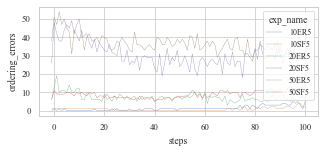

In [71]:
sns.set(context = 'paper',style='whitegrid', font_scale=1,
            rc={'figure.figsize':(5,2),'font.family':'serif', #(2.75,2)
            'font.size':'10','font.serif':['Times New Roman'],"lines.linewidth":'0.3','legend.fontsize':'8'})
sns.lineplot(data=t_results, x="steps", y="ordering_errors", hue="exp_name", ci = 90)
plt.savefig(figures_path / f"t_randomness.pdf", bbox_inches = 'tight')

In [37]:
t_results_majority = t_results.query("steps == -1")[["exp_name","ordering_errors"]]
t_results_per_step = t_results.query("steps != -1")[["exp_name","ordering_errors"]]
t_results_per_step["majority"] = t_results_per_step["exp_name"].map(t_results_majority.set_index("exp_name").to_dict()["ordering_errors"])
t_results_per_step["y_axis"] = 0.5
t_results_per_step["style"] = 0
t_results_per_step

,exp_name,ordering_errors,majority,y_axis,style
1,10ER5,1,0,0.5,0
2,10ER5,0,0,0.5,0
3,10ER5,1,0,0.5,0
4,10ER5,0,0,0.5,0
5,10ER5,1,0,0.5,0
...,...,...,...,...,...
607,50SF5,36,38,0.5,0
608,50SF5,39,38,0.5,0
609,50SF5,40,38,0.5,0
610,50SF5,36,38,0.5,0


/remote/rds/users/s2086085/miniconda3/envs/functorch_v1/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/remote/rds/users/s2086085/miniconda3/envs/functorch_v1/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/remote/rds/users/s2086085/miniconda3/envs/functorch_v1/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


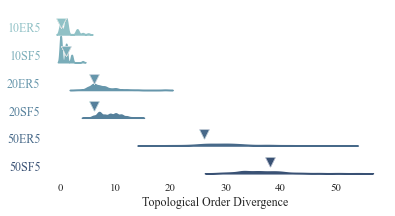

In [38]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_style({'font.family':'serif', 'font.size':'10', 'font.serif':['Times New Roman']})
pal = sns.cubehelix_palette(8, rot=-.25, light=.7)
g = sns.FacetGrid(t_results_per_step, row="exp_name", hue="exp_name", aspect=11, height=.5, palette=pal)
# Draw the densities in a few steps

g.map(sns.kdeplot, "ordering_errors",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.scatterplot,"majority","y_axis", marker= "v" , s=100, alpha = 0.1)

#g.map(sns.kdeplot, "ordering_errors", clip_on=False, color="w", lw=2, bw_adjust=.5)
# passing color=None to refline() uses the hue mapping
#g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color=color, #, fontweight="bold"
            ha="right", va="center", transform=ax.transAxes)


g.map(label, "ordering_errors")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=0)#-.25

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel='', xlabel = 'Topological Order Divergence')
g.despine(bottom=True, left=True)
#plt.savefig(figures_path / "majority_voting.pdf", bbox_inches = 'tight')